In [1]:
pip install pandas networkx matplotlib

In [ ]:
import pandas as pd

# Updated headers to remove "balcony" and include the additional node "entrance"
headers_corrected = [
    "closet", "bathroom", "corridor", "stairs", "washing_room",
    "bedroom", "closet", "living_room", "restroom", "entrance"
]

# Updated matrix to ensure only "corridor" connects to "stairs"
matrix_data_corrected = [
    [0, 1, 5, 0, 0, 0, 0, 0, 0, 0],  # Closet
    [1, 0, 7, 0, 0, 0, 0, 0, 0, 0],  # Bathroom
    [5, 7, 0, 3, 2, 4, 6, 6, 5, 10], # Corridor (central node with logical weights)
    [0, 0, 3, 0, 0, 0, 0, 0, 0, 0],  # Stairs (only connected to corridor)
    [0, 0, 2, 0, 0, 5, 0, 3, 0, 0],  # Washing Room (closer to bedroom, living room)
    [0, 0, 4, 0, 5, 0, 4, 1, 0, 0],  # Bedroom (closer to living room)
    [0, 0, 6, 0, 0, 4, 0, 2, 0, 0],  # Closet (different area, connected to living room)
    [0, 0, 6, 0, 3, 1, 2, 0, 4, 0],  # Living Room (connected logically to bedroom and restroom)
    [0, 0, 5, 0, 0, 0, 0, 4, 0, 0],  # Restroom (close to living room and corridor)
    [0, 0, 10, 0, 0, 0, 0, 0, 0, 0], # Entrance (only connects to Corridor with high weight)
]

# Create a DataFrame from the corrected matrix
matrix_df_corrected = pd.DataFrame(matrix_data_corrected, columns=headers_corrected, index=headers_corrected)

# Save the corrected DataFrame to an Excel file
excel_path_corrected = "/mnt/data/matrix_reconstructed_corrected.xlsx"
matrix_df_corrected.to_excel(excel_path_corrected, index=True)

excel_path_corrected


Number of nodes: 12
Number of edges: 18


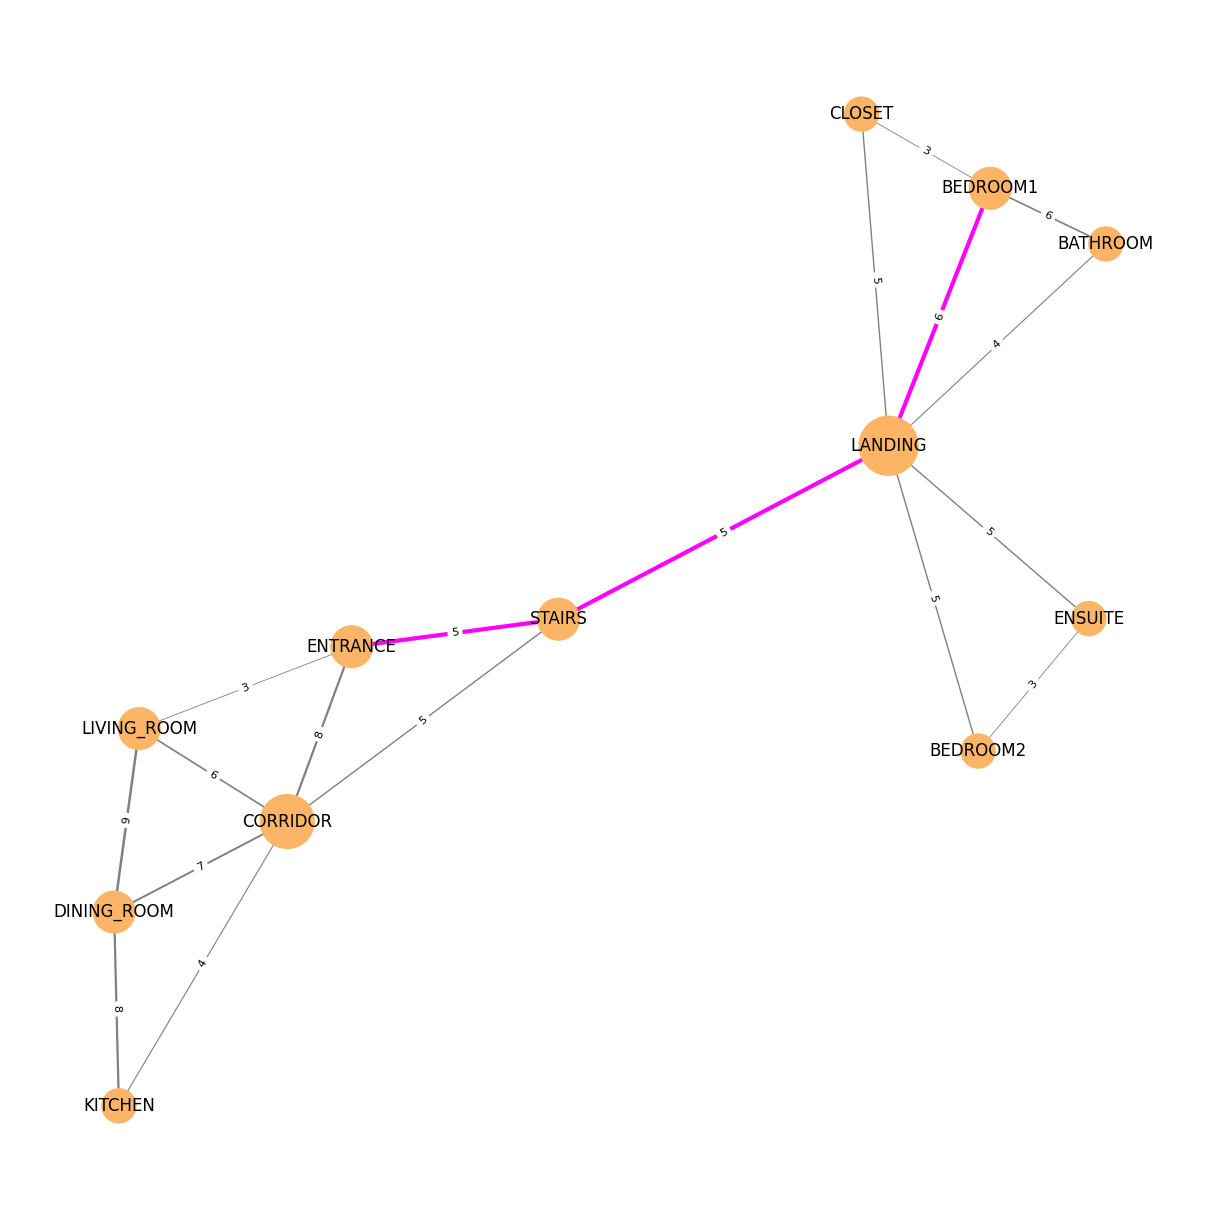

In [36]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

# Set font to Roboto
rcParams['font.family'] = 'Roboto'

# Load the matrix data from the updated Excel file
file_path = '/content/matrix_reconstructed_final_no_self_connection.xlsx'  # Ensure this is the correct path
matrix_df = pd.read_excel(file_path, index_col=0)

# Create an empty graph
WG = nx.Graph()

# Add nodes to the graph
nodes = matrix_df.index.tolist()
WG.add_nodes_from(nodes)

# Add edges with weights based on the matrix values
E = []
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):  # Avoid double-counting and self-loops
        weight = matrix_df.iloc[i, j]
        if weight != 0:
            E.append((nodes[i], nodes[j], weight))

WG.add_weighted_edges_from(E)

# Debugging: Print the number of nodes and edges
print(f"Number of nodes: {WG.number_of_nodes()}")
print(f"Number of edges: {WG.number_of_edges()}")

# Define colors for nodes (orange color)
node_colors = ['#fcb566'] * WG.number_of_nodes()  # Orange color for nodes

# Calculate node sizes based on degree centrality
node_sizes = [300 * WG.degree(node) for node in WG.nodes()]

# Calculate edge widths based on weights (scale up for better visibility)
edge_widths = [0.2 * WG[u][v]['weight'] for u, v in WG.edges()]

# Use a uniform color for all edges (matching number of edges)
edge_colors = ['Grey'] * WG.number_of_edges()

# Find the shortest path between "ENTRANCE" and "BEDROOM1" to show depth
shortest_path = nx.shortest_path(WG, source="ENTRANCE", target="BEDROOM1", weight='weight')
shortest_path_edges = list(zip(shortest_path, shortest_path[1:]))
depth = len(shortest_path) - 1  # Depth is the number of edges in the shortest path

# Draw the graph
plt.figure(figsize=(12, 12))  # Larger figure size

# Adjust the spring layout to be less spread out by decreasing the 'k' value
pos = nx.spring_layout(WG, seed=0, k=0.1)  # Decrease k to make nodes closer

# Draw the entire graph with default settings
nx.draw(
    WG, pos, node_color=node_colors, node_size=node_sizes,
    edge_color=edge_colors, width=edge_widths, with_labels=True
)

# Highlight the shortest path in red
nx.draw_networkx_edges(WG, pos, edgelist=shortest_path_edges, edge_color='Magenta', width=3)

# Draw edge labels with weights
labels = nx.get_edge_attributes(WG, 'weight')
nx.draw_networkx_edge_labels(WG, pos, edge_labels=labels, font_size=8)


# Show the graph
plt.show()



